In [1]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import sklearn
import sklearn.metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
#building all kinds of evaluating parameters
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score, roc_auc_score, average_precision_score, precision_recall_curve
from sklearn.metrics import roc_curve,auc, roc_auc_score, average_precision_score
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix 

In [3]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from xgboost import XGBClassifier
from math import sqrt
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [4]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.model_selection import train_test_split
classifier = RandomForestClassifier

In [5]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [6]:
import pandas as pd

url2 = 'Dataset/PRFI_4M_DEF_HEAD.txt'
df = pd.read_table(url2, sep=';')
df.head(5)

,ID_OPER,DT_OP_GMT,ORA_OP_GMT,COD_CANA,COD_CABC,COD_ESITO,PROCESSING_COD,IMP_TRZ_RECON,FL_AUTORIZZAZIONE,COD_ABC_PAES,...,PERC_ESITO_ALL_G,PERC_ESITO_ALL_M,DEV_MEDIA_AUT_SEC_4,DEV_MEDIA_AUT_TO_SEC_4,MEDIA_NON_AUT_SEC_4,MEDIA_NON_AUT_SEC_3,MEDIA_NON_AUT_SEC_2,TIME_NON_AUT_SEC_LAST,ANNO,MESE
0,6231261973,2016-03-14,11:27:28,ATM,6011,0,366100,0.00,T,ITA,...,0.0,0.0,-1.000000,-1.000000,3433466.75,3.764000e+03,5644.5,4498501,2016,3
1,6217512045,2016-03-09,09:48:09,INT,5942,0,6300,9.35,T,ITA,...,0.0,0.0,2.418578,1.092245,1375101.00,1.411049e+06,2070957.5,423982,2016,3
2,6204998318,2016-03-04,12:01:47,INT,5192,0,6300,17.90,T,ITA,...,0.0,0.0,0.864804,2.990299,1375101.00,1.411049e+06,2070957.5,685390,2016,3
3,6260986375,2016-03-25,08:29:03,INT,5968,0,6300,9.99,T,NLD,...,0.0,0.0,-0.279195,-0.279195,1375101.00,1.411049e+06,2070957.5,1377654,2016,3
4,6214969493,2016-03-08,10:36:09,POS,5411,0,0,22.25,T,ITA,...,0.0,0.0,0.306757,-0.103120,1964559.50,2.573075e+06,3425734.0,136317,2016,3


Text(0.5, 1.0, "Imbalanced Correlation Matrix \n (don't use for reference)")

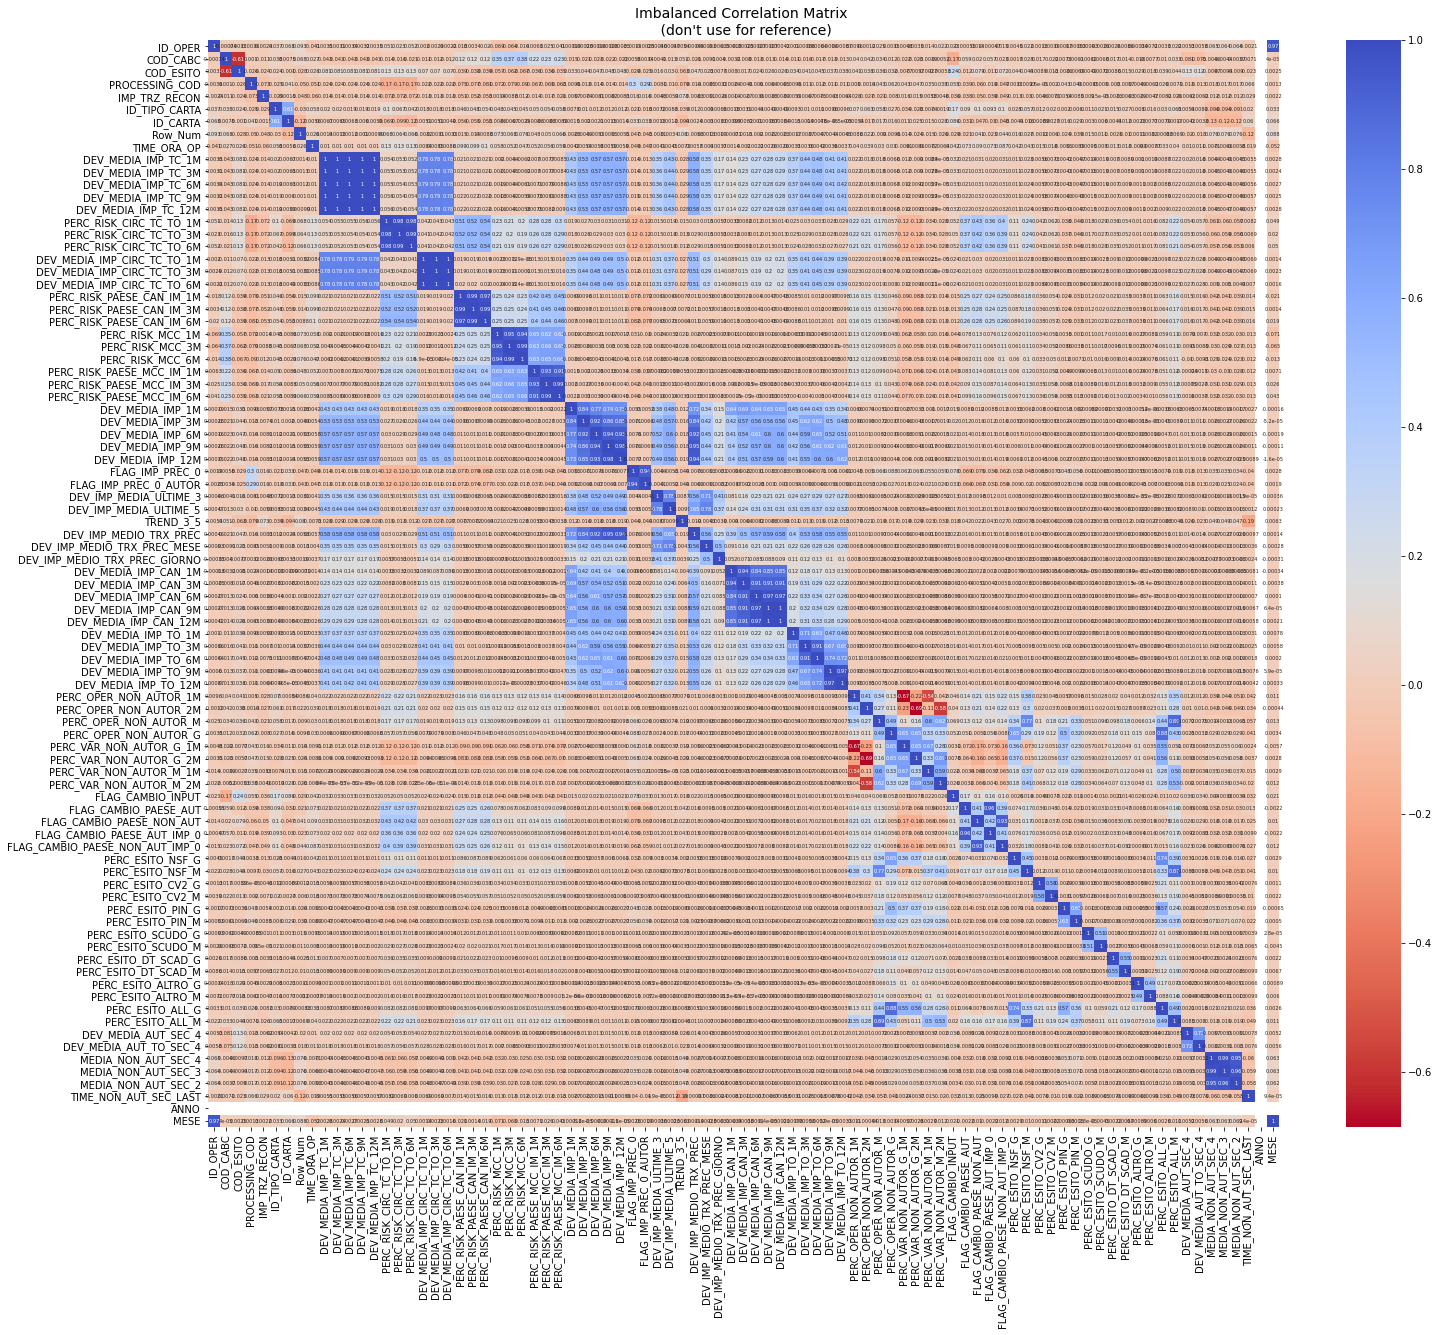

In [8]:
f, (ax1) = plt.subplots(1, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r',annot_kws={'size':5}, ax=ax1, annot=True)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

In [45]:
pd.set_option("display.max.columns", None)

In [48]:
df.head(10)

,ID_OPER,DT_OP_GMT,ORA_OP_GMT,COD_CANA,COD_CABC,COD_ESITO,PROCESSING_COD,IMP_TRZ_RECON,FL_AUTORIZZAZIONE,COD_ABC_PAES,ID_TIPO_CARTA,ID_CARTA,TIPO_INPUT_MODE,COD_CIRC,FLAG_FRODE,TRX_TYPE,Row_Num,TIME_ORA_OP,DEV_MEDIA_IMP_TC_1M,DEV_MEDIA_IMP_TC_3M,DEV_MEDIA_IMP_TC_6M,DEV_MEDIA_IMP_TC_9M,DEV_MEDIA_IMP_TC_12M,PERC_RISK_CIRC_TC_TO_1M,PERC_RISK_CIRC_TC_TO_3M,PERC_RISK_CIRC_TC_TO_6M,DEV_MEDIA_IMP_CIRC_TC_TO_1M,DEV_MEDIA_IMP_CIRC_TC_TO_3M,DEV_MEDIA_IMP_CIRC_TC_TO_6M,PERC_RISK_PAESE_CAN_IM_1M,PERC_RISK_PAESE_CAN_IM_3M,PERC_RISK_PAESE_CAN_IM_6M,PERC_RISK_MCC_1M,PERC_RISK_MCC_3M,PERC_RISK_MCC_6M,PERC_RISK_PAESE_MCC_IM_1M,PERC_RISK_PAESE_MCC_IM_3M,PERC_RISK_PAESE_MCC_IM_6M,DEV_MEDIA_IMP_1M,DEV_MEDIA_IMP_3M,DEV_MEDIA_IMP_6M,DEV_MEDIA_IMP_9M,DEV_MEDIA_IMP_12M,FLAG_IMP_PREC_0,FLAG_IMP_PREC_0_AUTOR,DEV_IMP_MEDIA_ULTIME_3,DEV_IMP_MEDIA_ULTIME_5,TREND_3_5,DEV_IMP_MEDIO_TRX_PREC,DEV_IMP_MEDIO_TRX_PREC_MESE,DEV_IMP_MEDIO_TRX_PREC_GIORNO,DEV_MEDIA_IMP_CAN_1M,DEV_MEDIA_IMP_CAN_3M,DEV_MEDIA_IMP_CAN_6M,DEV_MEDIA_IMP_CAN_9M,DEV_MEDIA_IMP_CAN_12M,DEV_MEDIA_IMP_TO_1M,DEV_MEDIA_IMP_TO_3M,DEV_MEDIA_IMP_TO_6M,DEV_MEDIA_IMP_TO_9M,DEV_MEDIA_IMP_TO_12M,PERC_OPER_NON_AUTOR_1M,PERC_OPER_NON_AUTOR_2M,PERC_OPER_NON_AUTOR_M,PERC_OPER_NON_AUTOR_G,PERC_VAR_NON_AUTOR_G_1M,PERC_VAR_NON_AUTOR_G_2M,PERC_VAR_NON_AUTOR_M_1M,PERC_VAR_NON_AUTOR_M_2M,FLAG_CAMBIO_INPUT,FLAG_CAMBIO_PAESE_AUT,FLAG_CAMBIO_PAESE_NON_AUT,FLAG_CAMBIO_PAESE_AUT_IMP_0,FLAG_CAMBIO_PAESE_NON_AUT_IMP_0,PERC_ESITO_NSF_G,PERC_ESITO_NSF_M,PERC_ESITO_CV2_G,PERC_ESITO_CV2_M,PERC_ESITO_PIN_G,PERC_ESITO_PIN_M,PERC_ESITO_SCUDO_G,PERC_ESITO_SCUDO_M,PERC_ESITO_DT_SCAD_G,PERC_ESITO_DT_SCAD_M,PERC_ESITO_ALTRO_G,PERC_ESITO_ALTRO_M,PERC_ESITO_ALL_G,PERC_ESITO_ALL_M,DEV_MEDIA_AUT_SEC_4,DEV_MEDIA_AUT_TO_SEC_4,MEDIA_NON_AUT_SEC_4,MEDIA_NON_AUT_SEC_3,MEDIA_NON_AUT_SEC_2,TIME_NON_AUT_SEC_LAST,ANNO,MESE
0,6231261973,2016-03-14,11:27:28,ATM,6011,0,366100,0.00,T,ITA,1028,24613723,B,DD,0,36,33,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000101,0.000108,0.000189,0.000000,0.000000,0.000000,0.000404,0.000594,0.000642,0.042054,0.044311,0.038547,0.000404,0.000594,0.000642,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,1.244306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000,-1.0,0.000000,-1.000000,1,0,0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-1.000000,-1.000000,3433466.75,3.764000e+03,5644.5,4498501,2016,3
1,6217512045,2016-03-09,09:48:09,INT,5942,0,6300,9.35,T,ITA,1010,25081167,P,VE,0,00,30,9,1.301502,0.912061,1.069857,1.328103,1.332703,0.001415,0.001187,0.000944,0.526389,0.712525,0.669716,0.085018,0.092023,0.084003,0.006369,0.004264,0.015064,0.000202,0.000270,0.000189,1.085027,1.035722,0.889534,0.641533,0.352347,0,0,0.327629,1.191230,0.605883,0.758037,0.914439,-1.000000,1.085027,1.035722,0.704278,0.438350,0.178377,1.085027,1.277540,0.751159,0.499911,0.271280,0.400000,0.5,0.000000,0.0,-0.400000,-0.5,-0.400000,-0.500000,0,0,1,0,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.418578,1.092245,1375101.00,1.411049e+06,2070957.5,423982,2016,3
2,6204998318,2016-03-04,12:01:47,INT,5192,0,6300,17.90,T,ITA,1010,25081167,P,VE,0,00,29,12,0.202181,-0.001242,0.081182,0.216076,0.218479,0.001415,0.001187,0.000944,-0.202696,-0.105469,-0.127830,0.085018,0.092023,0.084003,0.000101,0.001349,0.001095,0.000000,0.000000,0.000076,0.089106,0.063352,-0.013009,-0.142551,-0.293606,0,0,0.059404,0.151732,0.919836,-0.086802,-1.000000,-1.000000,0.089106,0.063352,-0.109777,-0.248683,-0.384479,0.089106,0.189665,-0.085289,-0.216527,-0.335951,0.400000,0.5,0.000000,0.0,-0.400000,-0.5,-0.400000,-0.500000,0,1,1,1,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.864804,2.990299,1375101.00,1.411049e+06,2070957.5,685390,2016,3
3,6260986375,2016-03-25,08:29:03,INT,5968,0,6300,9.99,T,NLD,1010,25081167,P,VE,0,00,31,8,1.154058,0.789566,0.937253,1.178955,1.183261,0.001415,0.0

In [47]:
df["FLAG_FRODE"].replace({"T": 1, "F": 0}, inplace=True)

In [11]:
df.columns

Index(['ID_OPER', 'DT_OP_GMT', 'ORA_OP_GMT', 'COD_CANA', 'COD_CABC',
       'COD_ESITO', 'PROCESSING_COD', 'IMP_TRZ_RECON', 'FL_AUTORIZZAZIONE',
       'COD_ABC_PAES', 'ID_TIPO_CARTA', 'ID_CARTA', 'TIPO_INPUT_MODE',
       'COD_CIRC', 'FLAG_FRODE', 'TRX_TYPE', 'Row_Num', 'TIME_ORA_OP',
       'DEV_MEDIA_IMP_TC_1M', 'DEV_MEDIA_IMP_TC_3M', 'DEV_MEDIA_IMP_TC_6M',
       'DEV_MEDIA_IMP_TC_9M', 'DEV_MEDIA_IMP_TC_12M',
       'PERC_RISK_CIRC_TC_TO_1M', 'PERC_RISK_CIRC_TC_TO_3M',
       'PERC_RISK_CIRC_TC_TO_6M', 'DEV_MEDIA_IMP_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CIRC_TC_TO_3M', 'DEV_MEDIA_IMP_CIRC_TC_TO_6M',
       'PERC_RISK_PAESE_CAN_IM_1M', 'PERC_RISK_PAESE_CAN_IM_3M',
       'PERC_RISK_PAESE_CAN_IM_6M', 'PERC_RISK_MCC_1M', 'PERC_RISK_MCC_3M',
       'PERC_RISK_MCC_6M', 'PERC_RISK_PAESE_MCC_IM_1M',
       'PERC_RISK_PAESE_MCC_IM_3M', 'PERC_RISK_PAESE_MCC_IM_6M',
       'DEV_MEDIA_IMP_1M', 'DEV_MEDIA_IMP_3M', 'DEV_MEDIA_IMP_6M',
       'DEV_MEDIA_IMP_9M', 'DEV_MEDIA_IMP_12M', 'FLAG_IMP_P

# SMOTE E OUTLIERS

Dataset di training un mese, tre mesi sarebbe stato troppo a livello computazionale

In [12]:
df["DT_OP_GMT"] = pd.to_datetime(df["DT_OP_GMT"])

start_datetr = '2016-03-01 00:00:00'
end_datetr = '2016-03-31 00:00:00'
start_datets = '2016-04-07 00:00:00'
end_datets = '2016-05-07 00:00:00'

mask_tr = (df['DT_OP_GMT'] >= start_datetr) & (df['DT_OP_GMT'] < end_datetr)
df_train = df.loc[mask_tr]
print(df_train)

mask = (df['DT_OP_GMT'] >= start_datets) & (df['DT_OP_GMT'] < end_datets)
df_test = df.loc[mask]
print(df_test)

            ID_OPER  DT_OP_GMT ORA_OP_GMT COD_CANA  COD_CABC  COD_ESITO  \
0        6231261973 2016-03-14   11:27:28      ATM      6011          0   
1        6217512045 2016-03-09   09:48:09      INT      5942          0   
2        6204998318 2016-03-04   12:01:47      INT      5192          0   
3        6260986375 2016-03-25   08:29:03      INT      5968          0   
4        6214969493 2016-03-08   10:36:09      POS      5411          0   
...             ...        ...        ...      ...       ...        ...   
5311941  6270575976 2016-03-29   11:09:28      ATM      5550          0   
5311960  6270575411 2016-03-29   11:09:24      ATM      5550          0   
5327339  6250169634 2016-03-21   11:41:09      ATM      5550          0   
5327432  6250174405 2016-03-21   11:42:31      ATM      5550          0   
5327566  6258475319 2016-03-24   10:20:58      ATM      5550          0   

         PROCESSING_COD  IMP_TRZ_RECON FL_AUTORIZZAZIONE COD_ABC_PAES  ...  \
0                3661

Abbiamo fatto la correlazione rimosso le features fortemente correlate

In [13]:
dfs = df_train[['ID_OPER', 'DT_OP_GMT', 'ORA_OP_GMT', 'COD_CANA', 'COD_CABC',
                'PROCESSING_COD', 'IMP_TRZ_RECON', 'FL_AUTORIZZAZIONE',
                'COD_ABC_PAES', 'ID_TIPO_CARTA', 'TIPO_INPUT_MODE',
                'COD_CIRC', 'FLAG_FRODE', 'TRX_TYPE', 'Row_Num', 'TIME_ORA_OP','DEV_MEDIA_IMP_TC_1M','PERC_RISK_CIRC_TC_TO_1M',
               'DEV_MEDIA_IMP_CAN_1M','DEV_MEDIA_IMP_TO_1M','PERC_OPER_NON_AUTOR_1M','PERC_OPER_NON_AUTOR_2M','MEDIA_NON_AUT_SEC_4',
               'DEV_IMP_MEDIA_ULTIME_3', 'PERC_RISK_MCC_1M','FLAG_IMP_PREC_0','TREND_3_5','FLAG_CAMBIO_PAESE_AUT',
               'FLAG_CAMBIO_PAESE_NON_AUT','PERC_ESITO_NSF_G','PERC_ESITO_CV2_G',
               'PERC_ESITO_PIN_G','PERC_ESITO_SCUDO_G','PERC_ESITO_DT_SCAD_G','PERC_ESITO_ALTRO_G',
               'DEV_MEDIA_AUT_SEC_4']]


In [14]:
# Normalizziamo la variabile importo

rob_scaler = RobustScaler()

dfs['IMP_TRZ_RECON_NORM'] = rob_scaler.fit_transform(dfs['IMP_TRZ_RECON'].values.reshape(-1,1)) 

dfs.drop(['IMP_TRZ_RECON'], axis=1, inplace=True)

c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
# Normalizziamo la variabile importo DEL DATASET DI TEST

rob_scaler = RobustScaler()

df_test['IMP_TRZ_RECON_NORM'] = rob_scaler.fit_transform(df_test['IMP_TRZ_RECON'].values.reshape(-1,1)) 

df_test.drop(['IMP_TRZ_RECON'], axis=1, inplace=True)

c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
#separating the X and the Y values
    
xTrain = dfs[['TIME_ORA_OP','ID_TIPO_CARTA','DEV_MEDIA_IMP_TC_1M', 'PERC_RISK_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CAN_1M', 'DEV_MEDIA_IMP_TO_1M', 'PERC_OPER_NON_AUTOR_1M',
       'PERC_OPER_NON_AUTOR_2M', 'MEDIA_NON_AUT_SEC_4',
       'DEV_IMP_MEDIA_ULTIME_3', 'PERC_RISK_MCC_1M', 'FLAG_IMP_PREC_0',
       'TREND_3_5','FLAG_CAMBIO_PAESE_NON_AUT',
       'PERC_ESITO_NSF_G', 'PERC_ESITO_CV2_G', 'PERC_ESITO_PIN_G',
       'PERC_ESITO_SCUDO_G', 'PERC_ESITO_DT_SCAD_G', 'PERC_ESITO_ALTRO_G',
       'DEV_MEDIA_AUT_SEC_4','IMP_TRZ_RECON_NORM']]

xTest = df_test[['TIME_ORA_OP','ID_TIPO_CARTA','DEV_MEDIA_IMP_TC_1M', 'PERC_RISK_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CAN_1M', 'DEV_MEDIA_IMP_TO_1M', 'PERC_OPER_NON_AUTOR_1M',
       'PERC_OPER_NON_AUTOR_2M', 'MEDIA_NON_AUT_SEC_4',
       'DEV_IMP_MEDIA_ULTIME_3', 'PERC_RISK_MCC_1M', 'FLAG_IMP_PREC_0',
       'TREND_3_5','FLAG_CAMBIO_PAESE_NON_AUT',
       'PERC_ESITO_NSF_G', 'PERC_ESITO_CV2_G', 'PERC_ESITO_PIN_G',
       'PERC_ESITO_SCUDO_G', 'PERC_ESITO_DT_SCAD_G', 'PERC_ESITO_ALTRO_G',
       'DEV_MEDIA_AUT_SEC_4','IMP_TRZ_RECON_NORM']]

yTrain = dfs["FLAG_FRODE"]

yTest = df_test["FLAG_FRODE"]

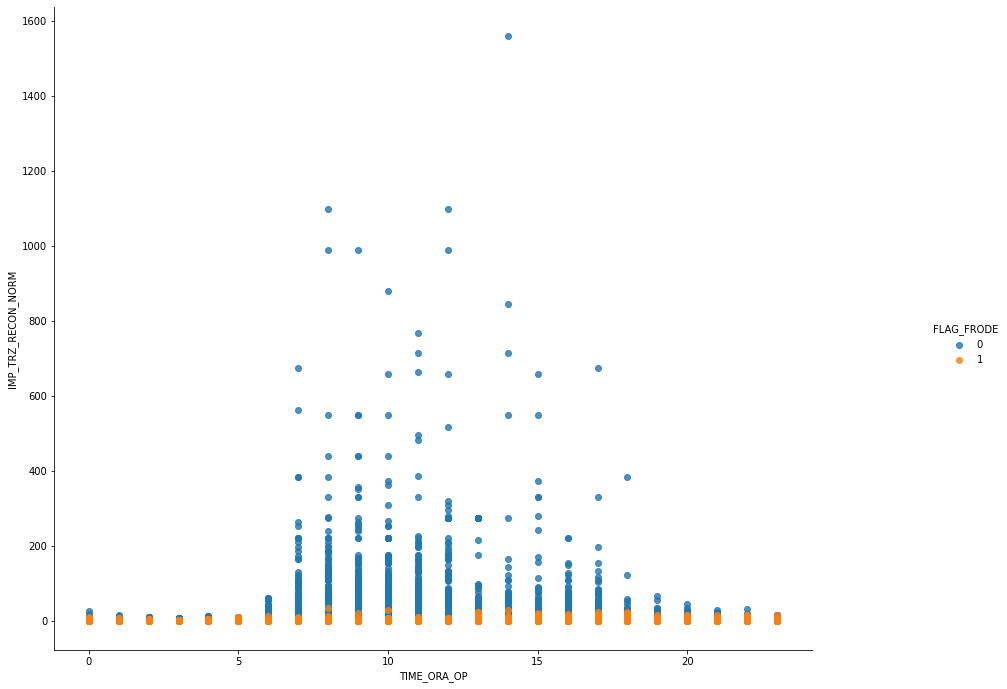

In [53]:
import seaborn as sns

sns.lmplot('TIME_ORA_OP', 'IMP_TRZ_RECON_NORM', dfs, hue='FLAG_FRODE', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

In [17]:
Xsmote, ysmote = SMOTE(sampling_strategy=1).fit_resample(xTrain, yTrain)
colonna = ['FLAG_FRODE']
oversampled_df_train = pd.concat([pd.DataFrame(ysmote, columns = colonna),pd.DataFrame(Xsmote)], axis=1)
df_test = pd.concat([pd.DataFrame(yTest, columns = colonna),pd.DataFrame(xTest)], axis=1)

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(yTrain)))
print("SMOTE data distribution: {}".format(Counter(ysmote)))

normal data distribution: Counter({0: 1711005, 1: 14320})
SMOTE data distribution: Counter({0: 1711005, 1: 1711005})


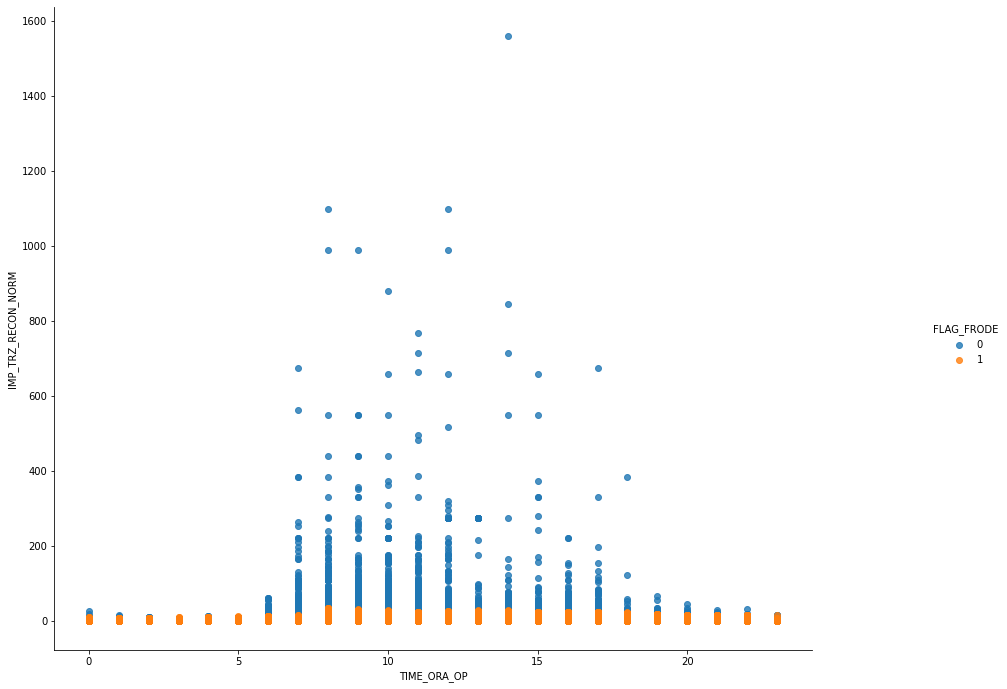

In [56]:
import seaborn as sns

sns.lmplot('TIME_ORA_OP', 'IMP_TRZ_RECON_NORM', oversampled_df_train, hue='FLAG_FRODE', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

In [55]:
oversampled_df_train

,FLAG_FRODE,TIME_ORA_OP,ID_TIPO_CARTA,DEV_MEDIA_IMP_TC_1M,PERC_RISK_CIRC_TC_TO_1M,DEV_MEDIA_IMP_CAN_1M,DEV_MEDIA_IMP_TO_1M,PERC_OPER_NON_AUTOR_1M,PERC_OPER_NON_AUTOR_2M,MEDIA_NON_AUT_SEC_4,DEV_IMP_MEDIA_ULTIME_3,PERC_RISK_MCC_1M,FLAG_IMP_PREC_0,TREND_3_5,FLAG_CAMBIO_PAESE_NON_AUT,PERC_ESITO_NSF_G,PERC_ESITO_CV2_G,PERC_ESITO_PIN_G,PERC_ESITO_SCUDO_G,PERC_ESITO_DT_SCAD_G,PERC_ESITO_ALTRO_G,DEV_MEDIA_AUT_SEC_4,IMP_TRZ_RECON_NORM
0,0,11,1028,0.000000,0.000101,0.000000,0.000000,0.000000,1.000000,3.433467e+06,0.000000,0.042054,0,1.244306,0,0.0,0.0,0.0,0.000000,0.0,0.0,-1.000000,-0.322280
1,0,9,1010,1.301502,0.001415,1.085027,1.085027,0.400000,0.500000,1.375101e+06,0.327629,0.006369,0,0.605883,1,0.0,0.0,0.0,0.000000,0.0,0.0,2.418578,-0.219611
2,0,12,1010,0.202181,0.001415,0.089106,0.089106,0.400000,0.500000,1.375101e+06,0.059404,0.000101,0,0.919836,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.864804,-0.125727
3,0,8,1010,1.154058,0.001415,0.951451,0.951451,0.400000,0.500000,1.375101e+06,0.242576,0.013344,0,0.814203,0,0.0,0.0,0.0,0.000000,0.0,0.0,-0.279195,-0.212584
4,0,10,1010,-0.032852,0.000000,-0.291140,-0.291140,0.058824,0.000000,1.964560e+06,-0.194457,0.002628,0,1.359270,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.306757,-0.077962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422005,1,10,1040,24.758987,0.162000,21.764673,31.957836,0.467290,0.273810,8.057268e+05,11.371833,0.006085,0,1.404057,0,0.0,0.0,0.0,0.220682,0.0,0.0,79.011898,-0.310813
3422006,1,20,1085,-0.503825,0.254852,-1.000000,-1.000000,0.000000,0.125000,1.808822e+06,-0.465163,0.045089,0,1.346931,0,0.0,0.0,0.0,0.000000,0.0,0.0,8.293013,1.887838
3422007,1,17,1079,0.284861,0.000091,0.249100,0.249100,0.117425,0.172208,9.911233e+05,0.002811,0.007320,0,1.115152,1,0.0,0.0,0.0,0.000000,0.0,0.0,-0.990435,-0.303496
3422008,1,6,1028,7.661128,0.207845,1.106728,0.789800,0.042553,0.000000,9.277450e+05,0.066899,0.083199,0,0.860373,0,0.0,0.0,0.0,0.000000,0.0,0.0,2.091648,-0.266608


Text(0.5, 1.0, "Imbalanced Correlation Matrix \n (don't use for reference)")

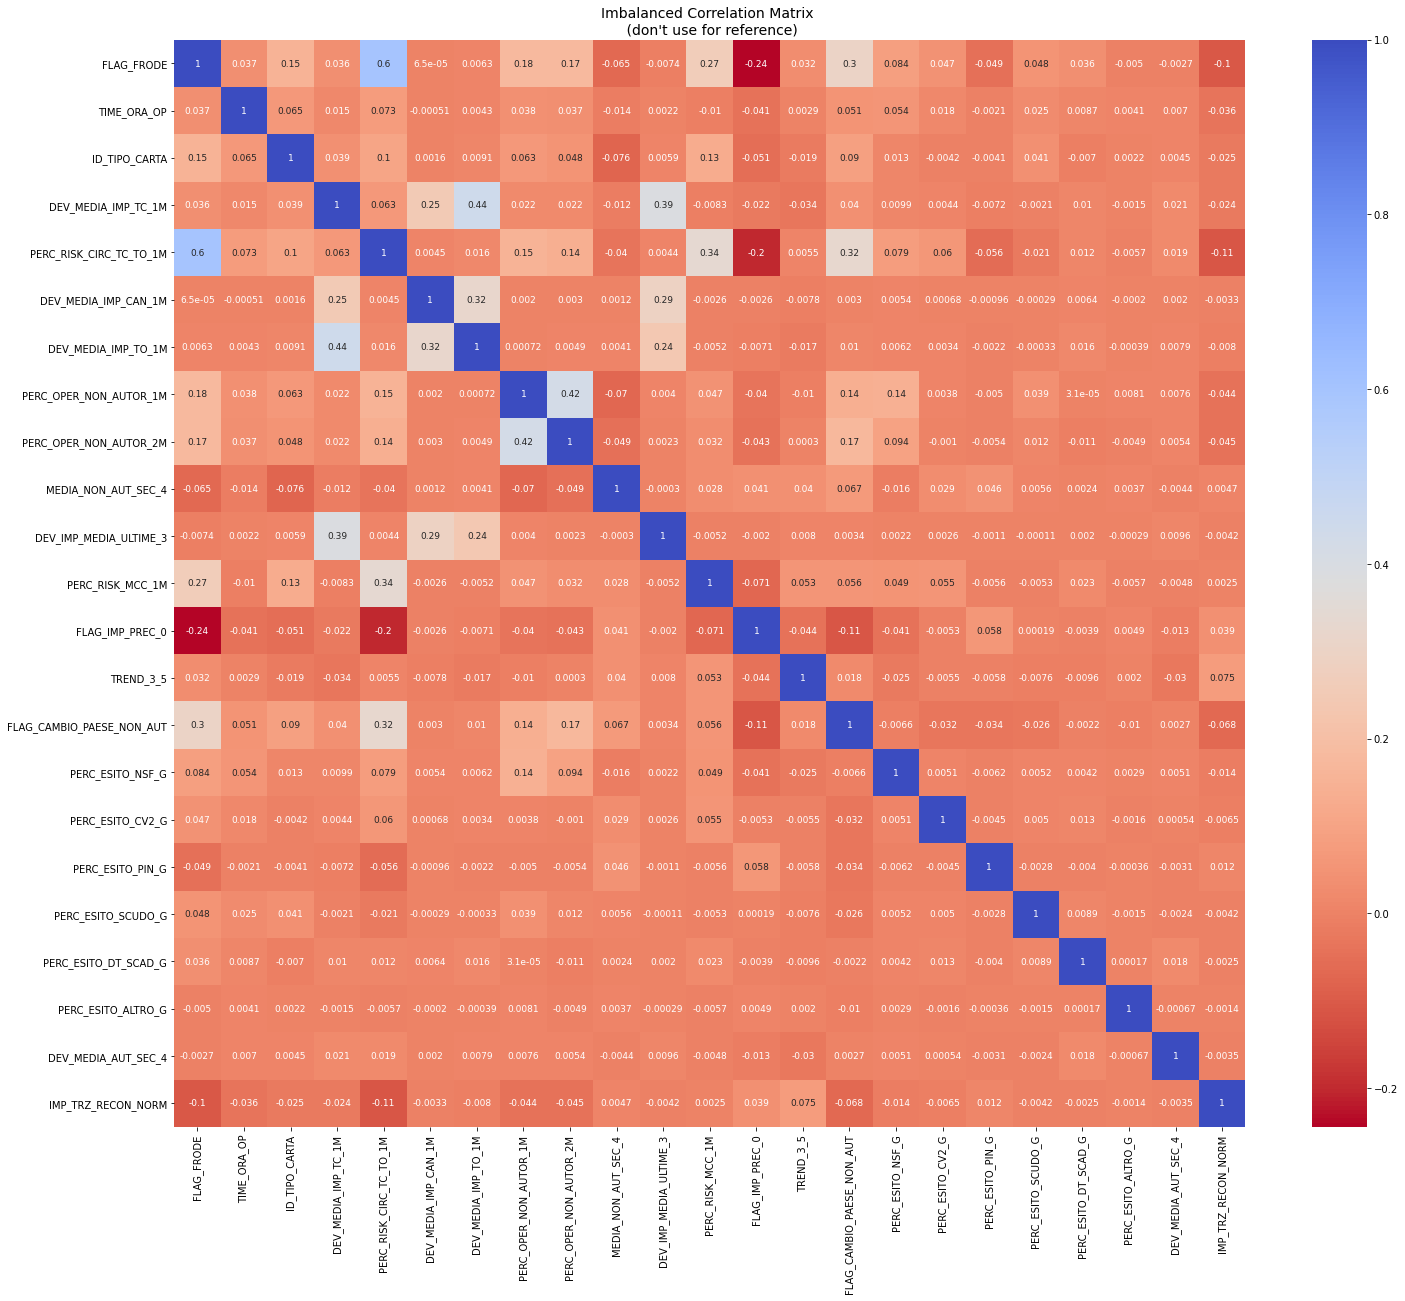

In [54]:
f, (ax1) = plt.subplots(1, 1, figsize=(24,20))

# Entire DataFrame
corr = oversampled_df_train.corr()
sns.heatmap(corr, cmap='coolwarm_r',annot_kws={'size':9}, ax=ax1, annot=True)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

Distribution of the Classes in the dataset
0    0.5
1    0.5
Name: FLAG_FRODE, dtype: float64


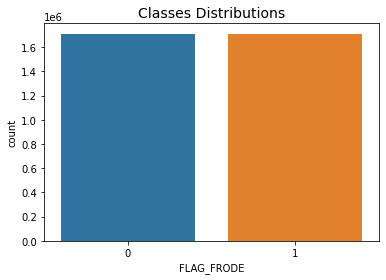

In [21]:
print('Distribution of the Classes in the dataset')
print(oversampled_df_train['FLAG_FRODE'].value_counts()/len(oversampled_df_train))

sns.countplot('FLAG_FRODE', data=oversampled_df_train)
plt.title('Classes Distributions', fontsize=14)
plt.show()

In [20]:
from sklearn.ensemble import IsolationForest
# identify outliers in the training dataset

iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(Xsmote)
# select all rows that are not outliers
mask = yhat != -1
Xsmote = Xsmote.iloc[mask, :]
ysmote = ysmote.iloc[mask]
# summarize the shape of the updated training dataset
print(Xsmote.shape, ysmote.shape)

(3079809, 22) (3079809,)


In [23]:
from sklearn.linear_model import LogisticRegression

#logistic regression model creation 
lr = LogisticRegression()
lr.fit(Xsmote,ysmote)
predictions_lr = lr.predict(xTest)
print(confusion_matrix(yTest, predictions_lr))

[[567503 839693]
 [  3706   8873]]


In [24]:
import numpy as np
cm_lr = confusion_matrix(yTest, predictions_lr)

tn = cm_lr[0][0]
fp = cm_lr[0][1]
fn = cm_lr[1][0]
tp = cm_lr[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions_lr) 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions_lr) 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )
precision = precision_score(yTest, predictions_lr) 
print("The precision Score is {}".format(precision)) 


roc_auc = roc_auc_score(yTest, predictions_lr) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions_lr) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

Accuracy 0.4059629166593298
The Recall is 0.7053819858494316
Specificity 0.40328639365092
The F1 Score is 0.020607447061760792
Precision:  0.010456464199602623
The precision Score is 0.010456464199602623
The ROC AUC Score is 0.5543341897501758
The Average precision Score is 0.009986074236564932
G-Mean 0.5333581884808196


In [25]:

# predict probabilities
lr_probs = lr.predict_proba(xTest)
lr_probs

preds = lr_probs[:,1]
precision, recall, threshold = precision_recall_curve(yTest, preds)
auc_score = auc(recall, precision)
print('lr PR AUC: %.3f' % auc_score)

lr PR AUC: 0.014


In [26]:
#For XGB
# Make predictions on validation dataset
XGB = XGBClassifier(random_state=0,n_jobs=-1, eval_metric = 'logloss',
                    use_label_encoder =False)
# Make predictions on validation dataset
XGB.fit(Xsmote,ysmote)
predictions_xgb = XGB.predict(xTest)

In [27]:

print(accuracy_score(yTest, predictions_xgb))
print(confusion_matrix(yTest, predictions_xgb))
print(classification_report(yTest, predictions_xgb))

0.5268926414396647
[[736244 670952]
 [   754  11825]]
              precision    recall  f1-score   support

           0       1.00      0.52      0.69   1407196
           1       0.02      0.94      0.03     12579

    accuracy                           0.53   1419775
   macro avg       0.51      0.73      0.36   1419775
weighted avg       0.99      0.53      0.68   1419775



In [ ]:
cm_xgb = confusion_matrix(yTest, predictions_xgb)

tn = cm_xgb[0][0]
fp = cm_xgb[0][1]
fn = cm_xgb[1][0]
tp = cm_xgb[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

roc_auc = roc_auc_score(yTest, predictions_xgb) 
print("The ROC AUC Score is {}".format(roc_auc))  

#Gmean
print('G-Mean',sqrt(recall*specificity))

In [28]:
cm_xgb = confusion_matrix(yTest, predictions_xgb)

tn = cm_xgb[0][0]
fp = cm_xgb[0][1]
fn = cm_xgb[1][0]
tp = cm_xgb[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions_xgb) 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions_xgb) 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )
precision = precision_score(yTest, predictions_xgb) 
print("The precision Score is {}".format(precision)) 


roc_auc = roc_auc_score(yTest, predictions_xgb) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions_xgb) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

Accuracy 0.5268926414396647
The Recall is 0.9400588282057397
Specificity 0.5231993268883652
The F1 Score is 0.03401135533453368
Precision:  0.017318978231545584
The precision Score is 0.017318978231545584
The ROC AUC Score is 0.7316290775470524
The Average precision Score is 0.016811928445986037
G-Mean 0.7013117325075264


In [29]:
from sklearn.metrics import precision_recall_curve
# predict probabilities
xgb_probs = XGB.predict_proba(xTest)
xgb_probs

array([[2.3869276e-03, 9.9761307e-01],
       [6.2401420e-01, 3.7598580e-01],
       [2.1122098e-03, 9.9788779e-01],
       ...,
       [9.9947304e-01, 5.2694045e-04],
       [9.9962693e-01, 3.7308896e-04],
       [9.9962693e-01, 3.7308896e-04]], dtype=float32)

In [30]:
preds = xgb_probs[:,1]
precision, recall, threshold = precision_recall_curve(yTest, preds)
auc_score = auc(recall, precision)
print("The PR AUC is {}".format(auc_score))

The PR AUC is 0.0720171519594268


In [31]:
#random forest model creation 
rfc = RandomForestClassifier(random_state=0)
rfc.fit(Xsmote,ysmote)
predictions_rf = rfc.predict(xTest)
print(confusion_matrix(yTest, predictions_rf))

[[1105738  301458]
 [   5448    7131]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88   1407196
           1       0.02      0.57      0.04     12579

    accuracy                           0.78   1419775
   macro avg       0.51      0.68      0.46   1419775
weighted avg       0.99      0.78      0.87   1419775



In [ ]:

print(classification_report(yTest, predictions_rf))

In [ ]:
cm = confusion_matrix(yTest, predictions_rf)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

roc_auc = roc_auc_score(yTest, predictions_rf) 
print("The ROC AUC Score is {}".format(roc_auc)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

In [32]:
cm = confusion_matrix(yTest, predictions_rf)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions_rf, average='weighted') 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions_rf, average='weighted') 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )

roc_auc = roc_auc_score(yTest, predictions_rf) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions_rf) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

Accuracy 0.7838347625504041
The Recall is 0.7838347625504041
Specificity 0.7857739788913556
The F1 Score is 0.8707469589358129
Precision:  0.023108406326861942
The ROC AUC Score is 0.6763355942632309
The Average precision Score is 0.016937318795558178
G-Mean 0.7848037717560944


In [33]:
# predict probabilities
rfc_probs = rfc.predict_proba(xTest)
preds = rfc_probs[:,1]
precision, recall, threshold = precision_recall_curve(yTest, preds)
auc_score = auc(recall, precision)
print("The PR AUC is {}".format(auc_score))

The PR AUC is 0.03321740390634498


In [34]:
#For Easy Ensemble
# Make predictions on validation dataset
easy = EasyEnsembleClassifier(random_state=0)
easy.fit(Xsmote,ysmote)
predictions_easy = easy.predict(xTest)
print(confusion_matrix(yTest, predictions_easy))

0.7910013910654857
[[1112081  295115]
 [   1616   10963]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88   1407196
           1       0.04      0.87      0.07     12579

    accuracy                           0.79   1419775
   macro avg       0.52      0.83      0.48   1419775
weighted avg       0.99      0.79      0.88   1419775



In [35]:
cm = confusion_matrix(yTest, predictions_easy)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions_easy, average='weighted') 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions_easy, average='weighted') 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )

roc_auc = roc_auc_score(yTest, predictions_easy) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions_easy) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

Accuracy 0.7910013910654857
The Recall is 0.7910013910654857
Specificity 0.7902815243931904
The F1 Score is 0.8750839669741949
Precision:  0.03581766739197198
The ROC AUC Score is 0.8309067213348416
The Average precision Score is 0.032354448889270186
G-Mean 0.7906413758009166


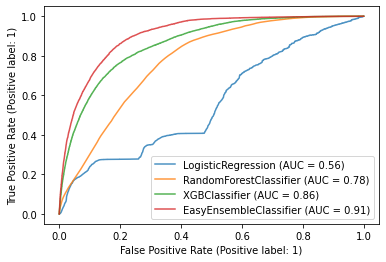

In [36]:
from sklearn.metrics import plot_roc_curve
ax = plt.gca()

LR_disp = plot_roc_curve(lr, xTest, yTest, ax=ax, alpha=0.8)
rfc_disp = plot_roc_curve(rfc, xTest, yTest, ax=ax, alpha=0.8)
xgb_disp = plot_roc_curve(XGB, xTest, yTest, ax=ax, alpha=0.8)
ada_disp = plot_roc_curve(easy, xTest, yTest, ax=ax, alpha=0.8)


plt.show()

In [ ]:
### LA VARIABILE FLAG FRODE è PIù CORRELATA CON LE FEATURES CHE UTILIZZEREMO SUCCESSIVAMENTO COME:
### 'PERC_RISK_MCC_1M','PERC_RISK_CIRC_TC_TO_1M','FLAG_CAMBIO_PAESE_NON_AUT',
### 'PERC_OPER_NON_AUTOR_1M','PERC_OPER_NON_AUTOR_2M'

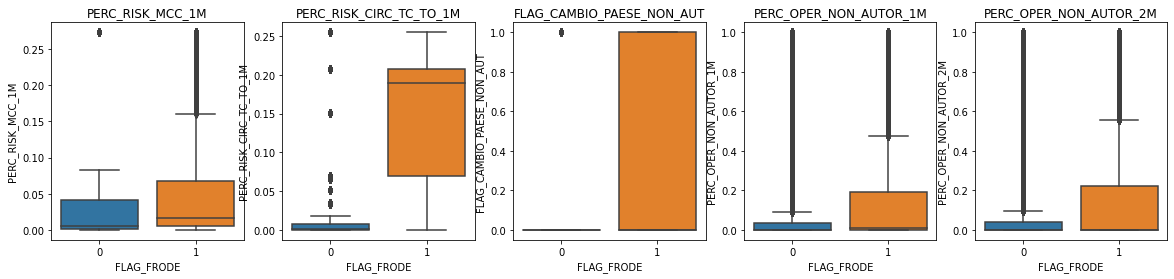

In [102]:
f, axes = plt.subplots(ncols=5, figsize=(20,4))

sns.boxplot(x="FLAG_FRODE", y="PERC_RISK_MCC_1M", data=oversampled_df_train,  ax=axes[0])
axes[0].set_title('PERC_RISK_MCC_1M')

sns.boxplot(x="FLAG_FRODE", y="PERC_RISK_CIRC_TC_TO_1M", data=oversampled_df_train,  ax=axes[1])
axes[1].set_title('PERC_RISK_CIRC_TC_TO_1M')

sns.boxplot(x="FLAG_FRODE", y="FLAG_CAMBIO_PAESE_NON_AUT", data=oversampled_df_train,  ax=axes[2])
axes[2].set_title('FLAG_CAMBIO_PAESE_NON_AUT')

sns.boxplot(x="FLAG_FRODE", y="PERC_OPER_NON_AUTOR_1M", data=oversampled_df_train,  ax=axes[3])
axes[3].set_title('PERC_OPER_NON_AUTOR_1M')

sns.boxplot(x="FLAG_FRODE", y="PERC_OPER_NON_AUTOR_2M", data=oversampled_df_train,  ax=axes[4])
axes[4].set_title('PERC_OPER_NON_AUTOR_2M')

plt.show()

In [ ]:
### 'PERC_RISK_MCC_1M','PERC_RISK_CIRC_TC_TO_1M','FLAG_CAMBIO_PAESE_NON_AUT',
### 'PERC_OPER_NON_AUTOR_1M','PERC_OPER_NON_AUTOR_2M'

In [103]:
#The interquartile range

# Rimuoviamo gli outliers di PERC_RISK_MCC_1M

PERC_RISK_MCC_1M_fraud = oversampled_df_train['PERC_RISK_MCC_1M'].
loc[oversampled_df_train['FLAG_FRODE'] == 1].values

q25, q75 = np.percentile(PERC_RISK_MCC_1M_fraud, 25), np.percentile(PERC_RISK_MCC_1M_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
PERC_RISK_MCC_1M_iqr = q75 - q25
print('iqr: {}'.format(PERC_RISK_MCC_1M_iqr))

#Lower Bound: (Q1 - 1.5 * IQR)
#Upper Bound: (Q3 + 1.5 * IQR)
#To get exactly 3σ, we need to take the scale = 1.7, but then 1.5 is more “symmetrical” than 1.7

PERC_RISK_MCC_1M_cut_off = PERC_RISK_MCC_1M_iqr * 1.5
PERC_RISK_MCC_1M_lower, PERC_RISK_MCC_1M_upper = q25 - PERC_RISK_MCC_1M_cut_off, q75 + 
PERC_RISK_MCC_1M_cut_off

print('Cut Off: {}'.format(PERC_RISK_MCC_1M_cut_off))


outliers = [x for x in PERC_RISK_MCC_1M_fraud if x < PERC_RISK_MCC_1M_lower or 
            x > PERC_RISK_MCC_1M_upper]

oversampled_df_train = oversampled_df_train.drop(oversampled_df_train[(
    oversampled_df_train['PERC_RISK_MCC_1M'] > IMP_TRZ_RECON_NORM_upper)
    | (oversampled_df_train['PERC_RISK_MCC_1M'] < IMP_TRZ_RECON_NORM_lower)].index)


# Rimuoviamo gli outliers di PERC_RISK_CIRC_TC_TO_1M

PERC_RISK_CIRC_TC_TO_1M_fraud = oversampled_df_train['PERC_RISK_CIRC_TC_TO_1M'].loc[oversampled_df_train['FLAG_FRODE'] == 1].values
q25, q75 = np.percentile(PERC_RISK_CIRC_TC_TO_1M_fraud, 25), np.percentile(PERC_RISK_CIRC_TC_TO_1M_fraud, 75)

PERC_RISK_CIRC_TC_TO_1M_iqr = q75 - q25


PERC_RISK_CIRC_TC_TO_1M_cut_off = PERC_RISK_CIRC_TC_TO_1M_iqr * 1.5
PERC_RISK_CIRC_TC_TO_1M_lower, PERC_RISK_CIRC_TC_TO_1M_upper = q25 -PERC_RISK_CIRC_TC_TO_1M_cut_off, q75 + PERC_RISK_CIRC_TC_TO_1M_cut_off

outliers = [x for x in PERC_RISK_CIRC_TC_TO_1M_fraud if x < PERC_RISK_CIRC_TC_TO_1M_lower or x > PERC_RISK_CIRC_TC_TO_1M_upper]

oversampled_df_train = oversampled_df_train.drop(oversampled_df_train[(oversampled_df_train['PERC_RISK_CIRC_TC_TO_1M'] > PERC_RISK_CIRC_TC_TO_1M_upper)
                                                       | (oversampled_df_train['PERC_RISK_CIRC_TC_TO_1M'] < PERC_RISK_CIRC_TC_TO_1M_lower)].index)
print('----' * 44)

# Rimuoviamo gli outliers di FLAG_CAMBIO_PAESE_NON_AUT

FLAG_CAMBIO_PAESE_NON_AUT_fraud = oversampled_df_train['FLAG_CAMBIO_PAESE_NON_AUT'].loc[oversampled_df_train['FLAG_FRODE'] == 1].values
q25, q75 = np.percentile(FLAG_CAMBIO_PAESE_NON_AUT_fraud, 25), np.percentile(FLAG_CAMBIO_PAESE_NON_AUT_fraud, 75)

FLAG_CAMBIO_PAESE_NON_AUT_iqr = q75 - q25


FLAG_CAMBIO_PAESE_NON_AUT_cut_off = FLAG_CAMBIO_PAESE_NON_AUT_iqr * 1.5
FLAG_CAMBIO_PAESE_NON_AUT_lower, FLAG_CAMBIO_PAESE_NON_AUT_upper = q25 - FLAG_CAMBIO_PAESE_NON_AUT_cut_off, q75 + FLAG_CAMBIO_PAESE_NON_AUT_cut_off

outliers = [x for x in FLAG_CAMBIO_PAESE_NON_AUT_fraud if x < FLAG_CAMBIO_PAESE_NON_AUT_lower or x > FLAG_CAMBIO_PAESE_NON_AUT_upper]

oversampled_df_train = oversampled_df_train.drop(oversampled_df_train[(oversampled_df_train['FLAG_CAMBIO_PAESE_NON_AUT'] > FLAG_CAMBIO_PAESE_NON_AUT_upper)
                                                       | (oversampled_df_train['FLAG_CAMBIO_PAESE_NON_AUT'] < FLAG_CAMBIO_PAESE_NON_AUT_lower)].index)
print('----' * 44)

# Rimuoviamo gli outliers di PERC_OPER_NON_AUTOR_1M

PERC_OPER_NON_AUTOR_1M_fraud = oversampled_df_train['PERC_OPER_NON_AUTOR_1M'].loc[oversampled_df_train['FLAG_FRODE'] == 1].values
q25, q75 = np.percentile(PERC_OPER_NON_AUTOR_1M_fraud, 25), np.percentile(PERC_OPER_NON_AUTOR_1M_fraud, 75)

PERC_OPER_NON_AUTOR_1M_iqr = q75 - q25

PERC_OPER_NON_AUTOR_1M_cut_off = PERC_OPER_NON_AUTOR_1M_iqr * 1.5
PERC_OPER_NON_AUTOR_1M_lower, PERC_OPER_NON_AUTOR_1M_upper = q25 - PERC_OPER_NON_AUTOR_1M_cut_off, q75 + PERC_OPER_NON_AUTOR_1M_cut_off

outliers = [x for x in PERC_OPER_NON_AUTOR_1M_fraud if x < PERC_OPER_NON_AUTOR_1M_lower or x > PERC_OPER_NON_AUTOR_1M_upper]

oversampled_df_train = oversampled_df_train.drop(oversampled_df_train[(oversampled_df_train['PERC_OPER_NON_AUTOR_1M'] > PERC_OPER_NON_AUTOR_1M_upper)
                                                       | (oversampled_df_train['PERC_OPER_NON_AUTOR_1M'] < PERC_OPER_NON_AUTOR_1M_lower)].index)



# Rimuoviamo gli outliers di PERC_OPER_NON_AUTOR_2M

PERC_OPER_NON_AUTOR_2M_fraud = oversampled_df_train['PERC_OPER_NON_AUTOR_1M'].loc[oversampled_df_train['FLAG_FRODE'] == 1].values
q25, q75 = np.percentile(PERC_OPER_NON_AUTOR_1M_fraud, 25), np.percentile(PERC_OPER_NON_AUTOR_2M_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
PERC_OPER_NON_AUTOR_2M_iqr = q75 - q25
print('iqr: {}'.format(PERC_OPER_NON_AUTOR_2M_iqr))

PERC_OPER_NON_AUTOR_2M_cut_off = PERC_OPER_NON_AUTOR_2M_iqr * 1.5
PERC_OPER_NON_AUTOR_2M_lower, PERC_OPER_NON_AUTOR_2M_upper = q25 - PERC_OPER_NON_AUTOR_2M_cut_off, q75 + PERC_OPER_NON_AUTOR_2M_cut_off

outliers = [x for x in PERC_OPER_NON_AUTOR_2M_fraud if x < PERC_OPER_NON_AUTOR_2M_lower or x > PERC_OPER_NON_AUTOR_2M_upper]

oversampled_df_train = oversampled_df_train.drop(oversampled_df_train[(oversampled_df_train['PERC_OPER_NON_AUTOR_2M'] > PERC_OPER_NON_AUTOR_2M_upper)
                                                       | (oversampled_df_train['PERC_OPER_NON_AUTOR_2M'] < PERC_OPER_NON_AUTOR_2M_lower)].index)
print('----' * 44)


Quartile 25: 0.005269007713720656 | Quartile 75: 0.06737231110139952
iqr: 0.06210330338767886
Cut Off: 0.09315495508151829
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: 0.0 | Quartile 75: 0.125
iqr: 0.125
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [104]:
oversampled_df_train

,FLAG_FRODE,TIME_ORA_OP,ID_TIPO_CARTA,DEV_MEDIA_IMP_TC_1M,PERC_RISK_CIRC_TC_TO_1M,DEV_MEDIA_IMP_CAN_1M,DEV_MEDIA_IMP_TO_1M,PERC_OPER_NON_AUTOR_1M,PERC_OPER_NON_AUTOR_2M,MEDIA_NON_AUT_SEC_4,...,TREND_3_5,FLAG_CAMBIO_PAESE_NON_AUT,PERC_ESITO_NSF_G,PERC_ESITO_CV2_G,PERC_ESITO_PIN_G,PERC_ESITO_SCUDO_G,PERC_ESITO_DT_SCAD_G,PERC_ESITO_ALTRO_G,DEV_MEDIA_AUT_SEC_4,IMP_TRZ_RECON_NORM
3,0,10,1010,-0.032852,0.000000,-0.291140,-0.291140,0.058824,0.0,1.964560e+06,...,1.359270,0,0.0,0.0,0.0,0.0,0.0,0.0,0.306757,-0.078139
4,0,18,1010,0.434603,0.001415,-0.400000,-0.400000,0.058824,0.0,2.709691e+06,...,0.959338,0,0.0,0.5,0.0,0.0,0.0,0.0,8.763520,-0.156602
5,0,19,1010,0.591645,0.000000,0.166579,0.166579,0.058824,0.0,1.964560e+06,...,0.677430,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.738304,-0.172619
6,0,13,1010,2.912553,0.000000,1.867662,1.867662,0.058824,0.0,1.964560e+06,...,1.156530,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.060605,-0.259416
7,0,10,1010,1.758852,0.000000,1.022070,1.022070,0.058824,0.0,2.709691e+06,...,0.688062,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.525783,-0.234524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900434,1,21,1085,64.061076,0.254852,0.581159,0.581159,0.280000,0.1,1.510465e+05,...,1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,44.944235,-0.304545
900435,1,13,1028,31.623952,0.207845,-0.011889,-0.000745,0.000000,0.0,0.000000e+00,...,1.000895,1,0.0,0.0,0.0,0.0,0.0,0.0,-0.747035,-0.304372
900437,1,19,1071,2.145060,0.015261,-0.808514,-0.787936,0.221718,0.0,6.978619e+06,...,0.867237,0,0.0,0.0,0.0,0.0,0.0,0.0,0.078396,0.051009
900439,1,10,1085,103.254496,0.254852,3.001893,5.276439,0.000000,0.0,6.525000e+03,...,0.967118,1,0.0,0.0,0.0,0.0,0.0,0.0,5.674196,-0.309957


In [105]:
oversampled_df_train['FLAG_FRODE'].value_counts()[0]

743882

In [108]:
#building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier(random_state=0,max_depth = 6)
rfc.fit(Xsmote,ysmote)
predictions = rfc.predict(xTest)
print(accuracy_score(yTest, predictions))
print(confusion_matrix(yTest, predictions))
print(classification_report(yTest, predictions))

0.9897074679521543
[[489008   1188]
 [  3900    243]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    490196
           1       0.17      0.06      0.09      4143

    accuracy                           0.99    494339
   macro avg       0.58      0.53      0.54    494339
weighted avg       0.99      0.99      0.99    494339

